In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

2023-08-29 21:48:58.285020: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-29 21:48:58.607715: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-29 21:48:58.609574: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 21:49:00.887785: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
skin_df=pd.read_csv('data/HAM10000_metadata.csv')

SIZE =32

In [3]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [4]:
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [5]:
skin_df['label'] = le.transform((skin_df['dx']))
skin_df.sample(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
1617,HAM_0007180,ISIC_0033272,mel,histo,65.0,male,face,4
8128,HAM_0007195,ISIC_0031923,nv,histo,40.0,female,lower extremity,5
2168,HAM_0001835,ISIC_0026652,mel,histo,65.0,male,back,4
1090,HAM_0000465,ISIC_0030583,bkl,consensus,35.0,female,trunk,2
7754,HAM_0001720,ISIC_0034010,nv,histo,45.0,male,abdomen,5
8071,HAM_0006333,ISIC_0024424,nv,histo,35.0,male,trunk,5
7423,HAM_0004548,ISIC_0032832,nv,histo,45.0,female,upper extremity,5
8984,HAM_0006526,ISIC_0026671,nv,histo,55.0,male,lower extremity,5
2310,HAM_0003102,ISIC_0032389,mel,histo,65.0,male,face,4
7256,HAM_0004260,ISIC_0025525,nv,histo,65.0,male,back,5


# Data Distribution visuaization

/tmp/ipykernel_3771/1260305846.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'], fit=stats.norm, color='red');


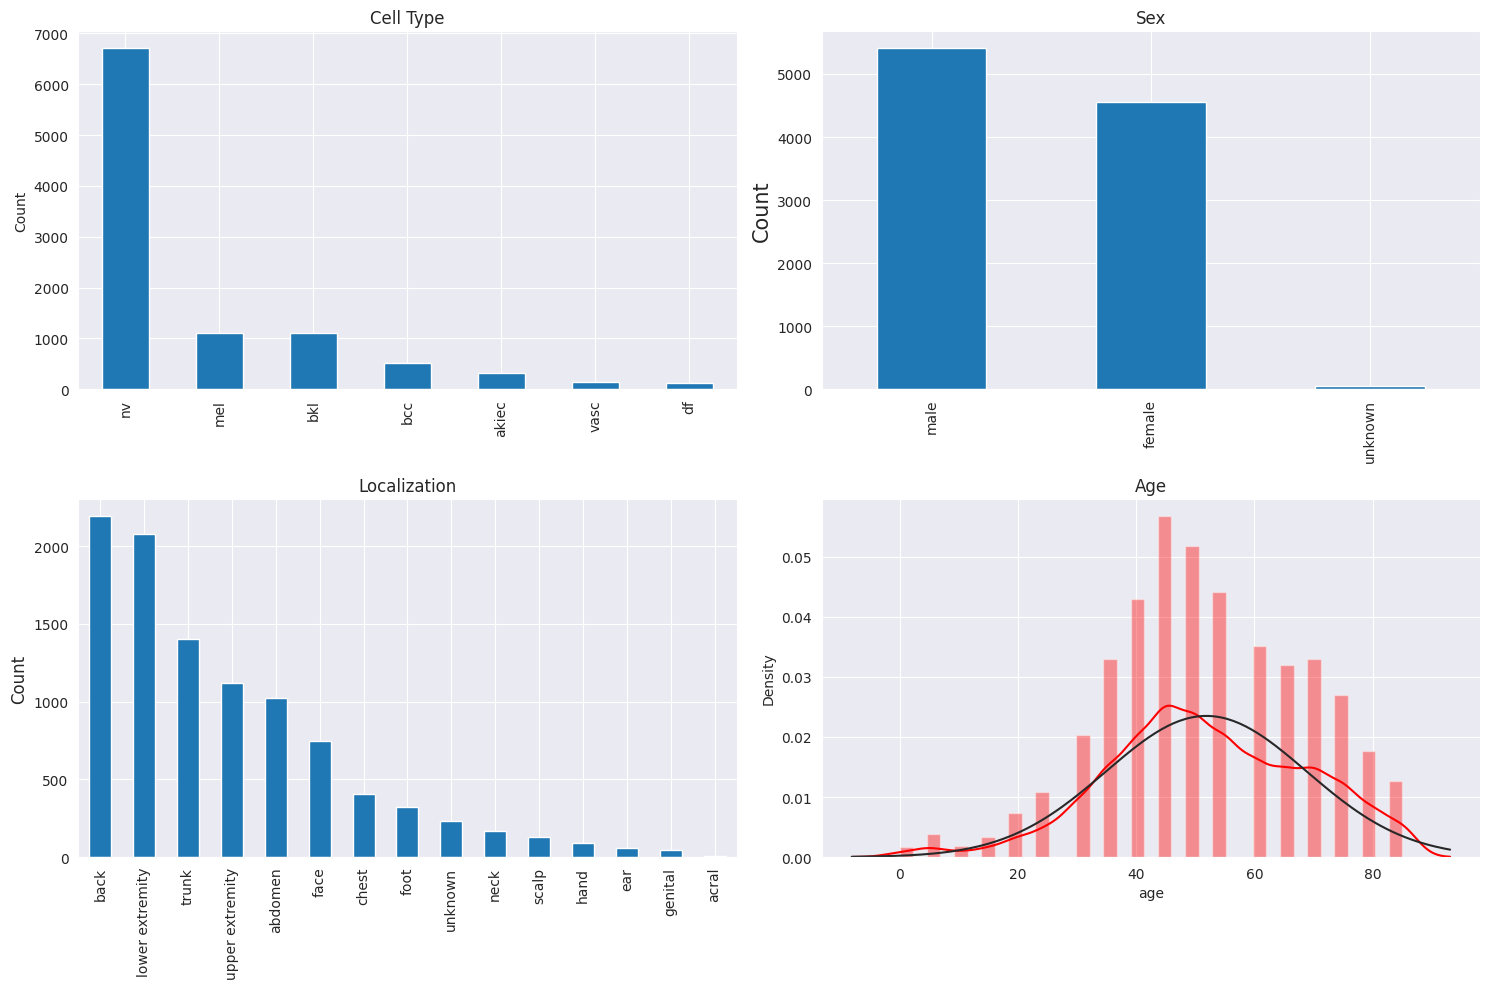

In [6]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')


ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()

# Distribution of data into variuos classes

In [7]:
from sklearn.utils import  resample
print(skin_df['label'].value_counts())

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64


# Balancing Classes

In [8]:
df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

n_samples=500
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced,
                              df_2_balanced, df_3_balanced,
                              df_4_balanced, df_5_balanced, df_6_balanced])

#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
print(skin_df_balanced['label'].value_counts())

0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: label, dtype: int64


# Loading the data

In [9]:
import os

In [10]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join('data/', '*', '*.jpg'))}
#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))


n_samples = 5  


# Visualizting

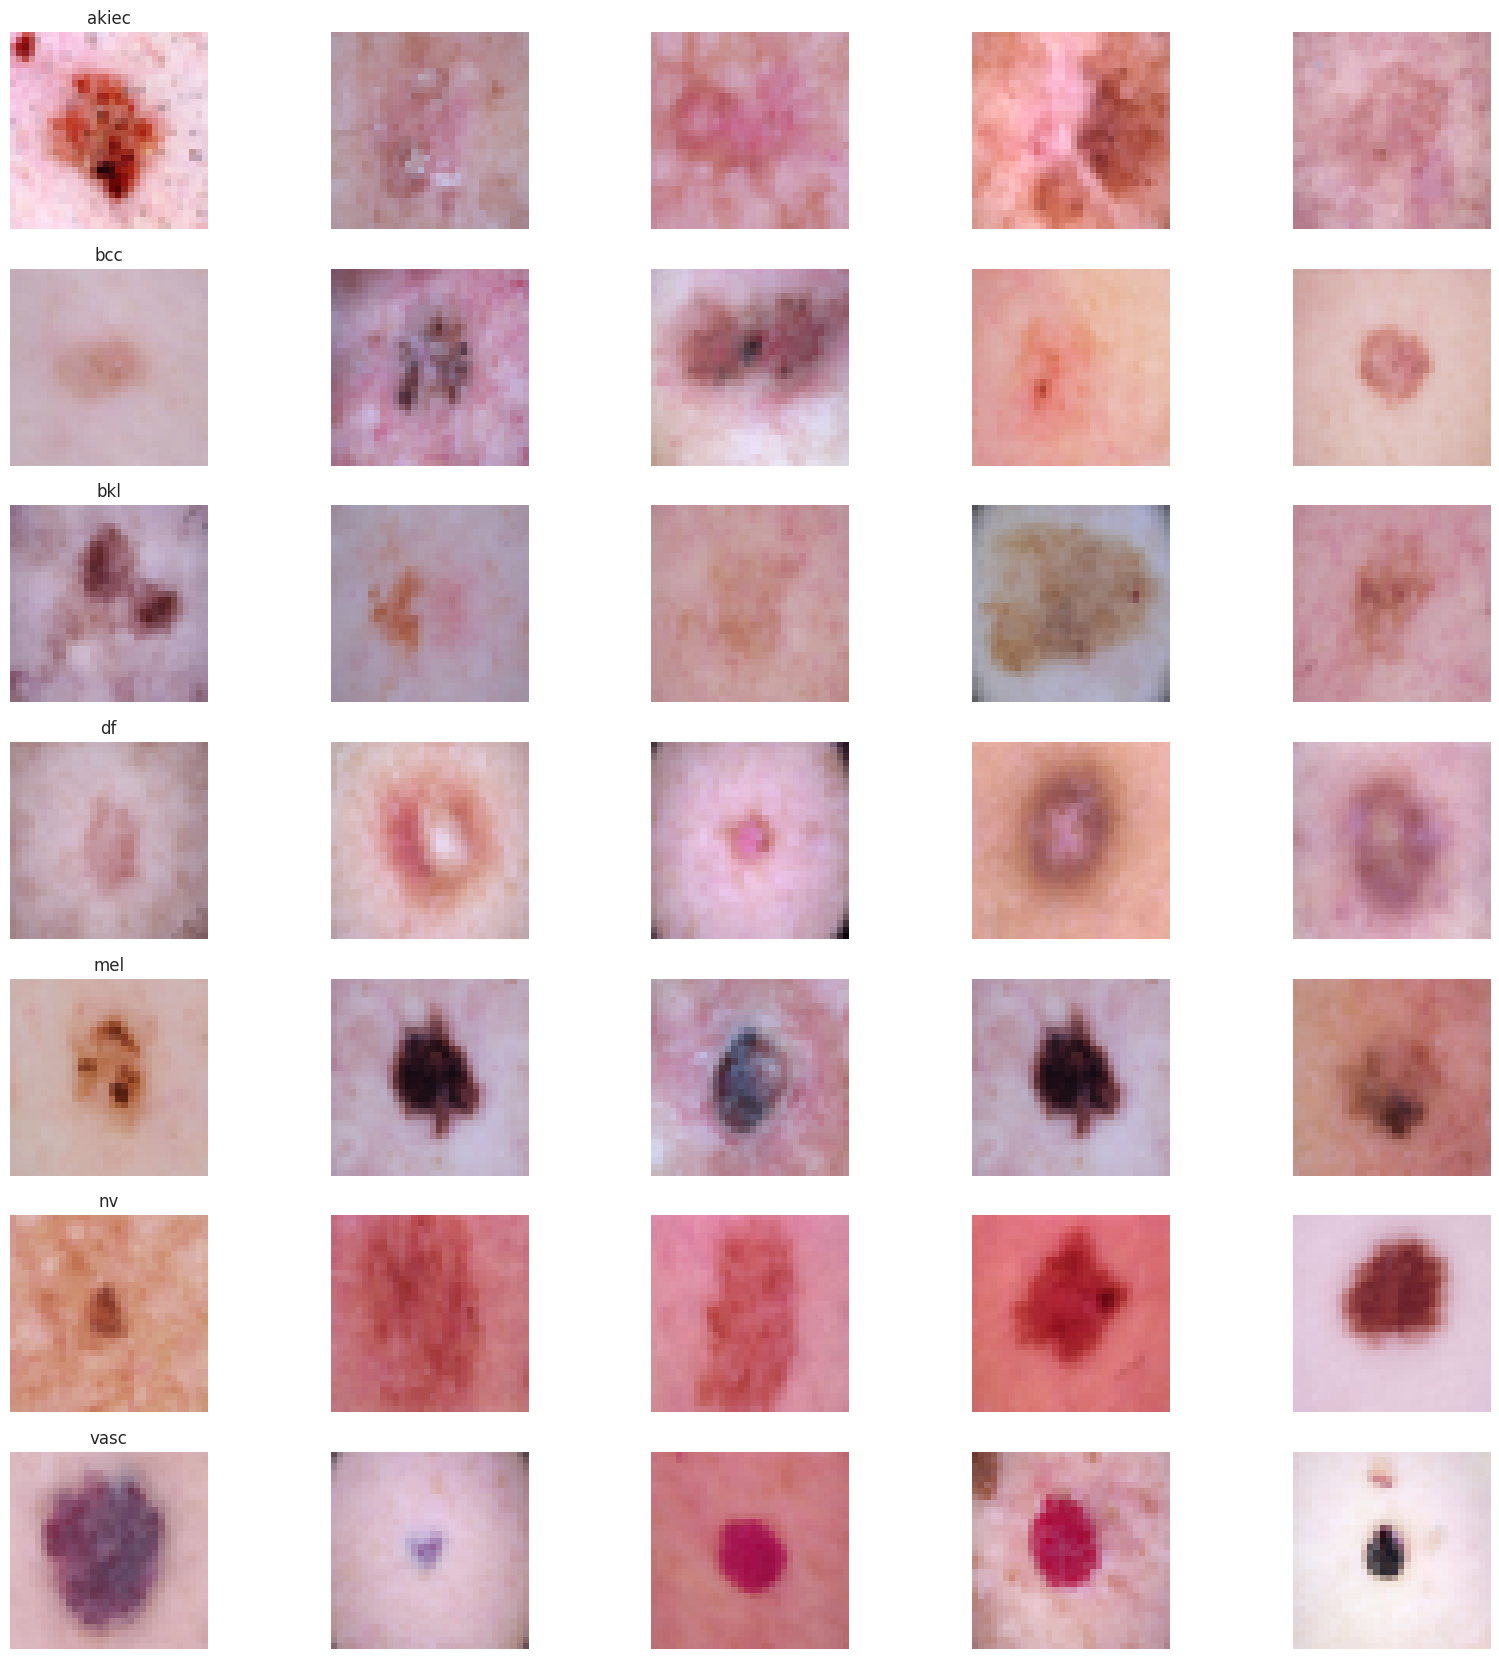

In [11]:
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

# Converting dataframe into numpy array

In [12]:
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255.  # Scale values to 0-1. You can also used standardscaler or other scaling methods.
Y=skin_df_balanced['label']  #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem
#Split to training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)


# Defining model

In [35]:
num_classes = 7

model = Sequential()
model.add(Conv2D(256, (3, 3),activation = "relu", input_shape=(SIZE, SIZE, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3),activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3),activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32, kernel_regularizer=keras.regularizers.l2(0.01),kernel_initializer='he_normal'))

model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 15, 15, 256)      0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 15, 15, 256)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 6, 6, 128)        

# Compiling model

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

# Training

In [37]:
history = model.fit(
    x_train,y_train,
    epochs= 100,
    batch_size = 16,
    validation_data=(x_test,y_test),
)

Epoch 1/100
165/165 [==============================] - 14s 78ms/step - loss: 2.2614 - accuracy: 0.1901 - val_loss: 2.0960 - val_accuracy: 0.1291
Epoch 2/100
165/165 [==============================] - 13s 77ms/step - loss: 1.9067 - accuracy: 0.2457 - val_loss: 1.8620 - val_accuracy: 0.2583
Epoch 3/100
165/165 [==============================] - 13s 76ms/step - loss: 1.7116 - accuracy: 0.3162 - val_loss: 1.6534 - val_accuracy: 0.3166
Epoch 4/100
165/165 [==============================] - 13s 76ms/step - loss: 1.5397 - accuracy: 0.3962 - val_loss: 1.4913 - val_accuracy: 0.3817
Epoch 5/100
165/165 [==============================] - 13s 77ms/step - loss: 1.4926 - accuracy: 0.4015 - val_loss: 1.4851 - val_accuracy: 0.4183
Epoch 6/100
165/165 [==============================] - 14s 88ms/step - loss: 1.4423 - accuracy: 0.4248 - val_loss: 1.4594 - val_accuracy: 0.4286
Epoch 7/100
165/165 [==============================] - 16s 95ms/step - loss: 1.4191 - accuracy: 0.4377 - val_loss: 1.4021 - val_ac

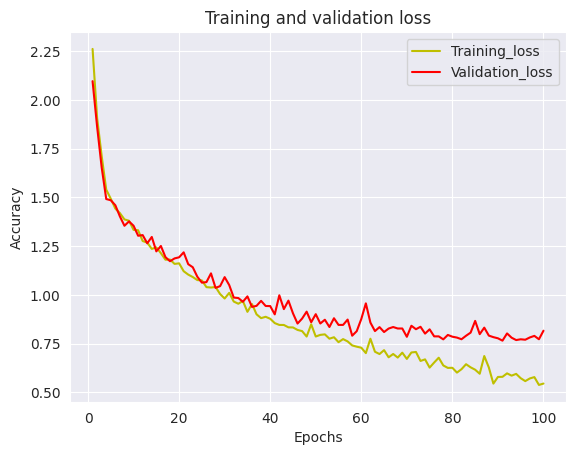

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label = 'Training_loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
score = model.evaluate(x_test,y_test)
print('Test Accuracy', score[1])

28/28 [==============================] - 1s 32ms/step - loss: 0.8159 - accuracy: 0.7520
Test Accuracy 0.7519999742507935


# Prediction on test data

In [40]:
y_pred = model.predict(x_test)

28/28 [==============================] - 1s 29ms/step


### converting predictions classes to one hot vectors

In [41]:
y_pred_classes = np.argmax(y_pred, axis=1)

### convert test data to one hot vectors

In [42]:
y_true = np.argmax(y_test, axis=1)

### printing confusion matrix

In [43]:
cm = confusion_matrix(y_true,y_pred_classes)

<AxesSubplot: >

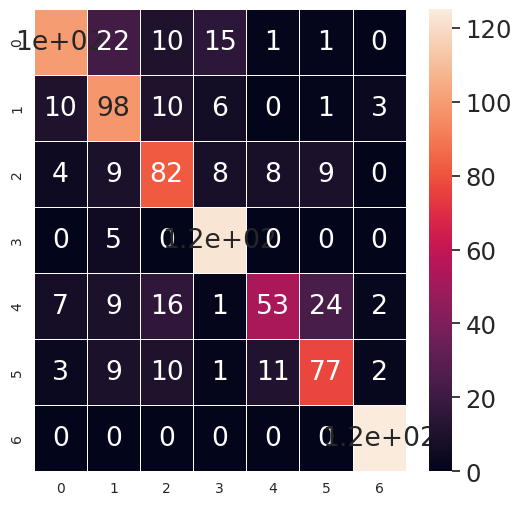

In [44]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale = 1.6)
sns.heatmap(cm,annot = True, linewidths= .5, ax=ax)

### plotting incorrect fraction

Text(0, 0.5, 'Fraction of incorrect Prediction')

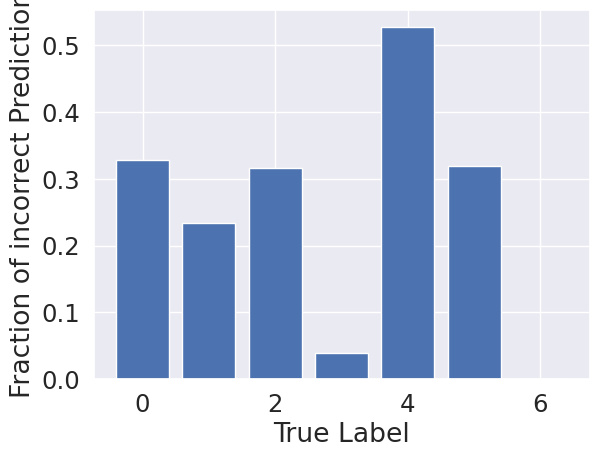

In [46]:
incorr_fraction= 1-np.diag(cm)/np.sum(cm,axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect Prediction')